# Lab 3 - Classification of ASL Data Set

This is a project group assignment.

**Due: Monday, March 23, 11:59 PM**

## Grading Rubric

1. **Problem 1 (10 pts):** you have included a screenshot of your Zoom meeting/s.
    
2. **Problem 2 (90 pts):** you have implemented all classifiers listed and reported the results in a summary table. You have also included a discussion of the results.

**Total: 100 pts**

# Comparison of Classifiers on ASL Data Set

The objective of Lab 3 is to compile an initial end-to-end machine learning pipeline that includes pre-processing, classification and evaluation on the ASL project data set. You will compare classifiers implemented and provide discussion as to why some out-perform others given the properties of the data set and the classifiers used.

**You can use ```scikit-learn``` modules.**

**Objectives**

By completing this assignment you will practice and master the following skills:

Implementation and performance comparison:
* Linear Discriminant Analysis (LDA) Classifier
* $k$-Nearest Neighbor classifier
* Decision Tree
* Random Forests
* Support Vector Machines
* Multi-Layer Perceptron
* Comparison Summary of Supervised Models

**Create your Repo**

You can create the repo for this assignment by visiting the following link: https://classroom.github.com/g/z4FUTzu1

# Training Data Set

The training data set was collected from the entire class of EEL 4930. The training set contains 1844 samples of $100\times 100$ RGB images. 
* You can download both the training data set (**"train_data.npy"**) and training labels (**"train_labels.npy"**) from our Canvas page [here](https://ufl.instructure.com/courses/395133/files/folder/Project%20Data).

# Problem 1 Description

As we have moved to a virtual environment communication, I am recommending that each team meet via Zoom.

You can schedule meetings that best work for your team here: https://ufl.zoom.us/

* Attach a screenshot proof that you have created a meeting and attended the meeting via Zoom.

* To facilitate collaborative coding while you are communicating via Zoom, I recommend that you use [Google Colab](https://colab.research.google.com/). 
    * You can edit all your Jupter Notebooks in this platform. The updates are live so your teammates can view and participate in real time.

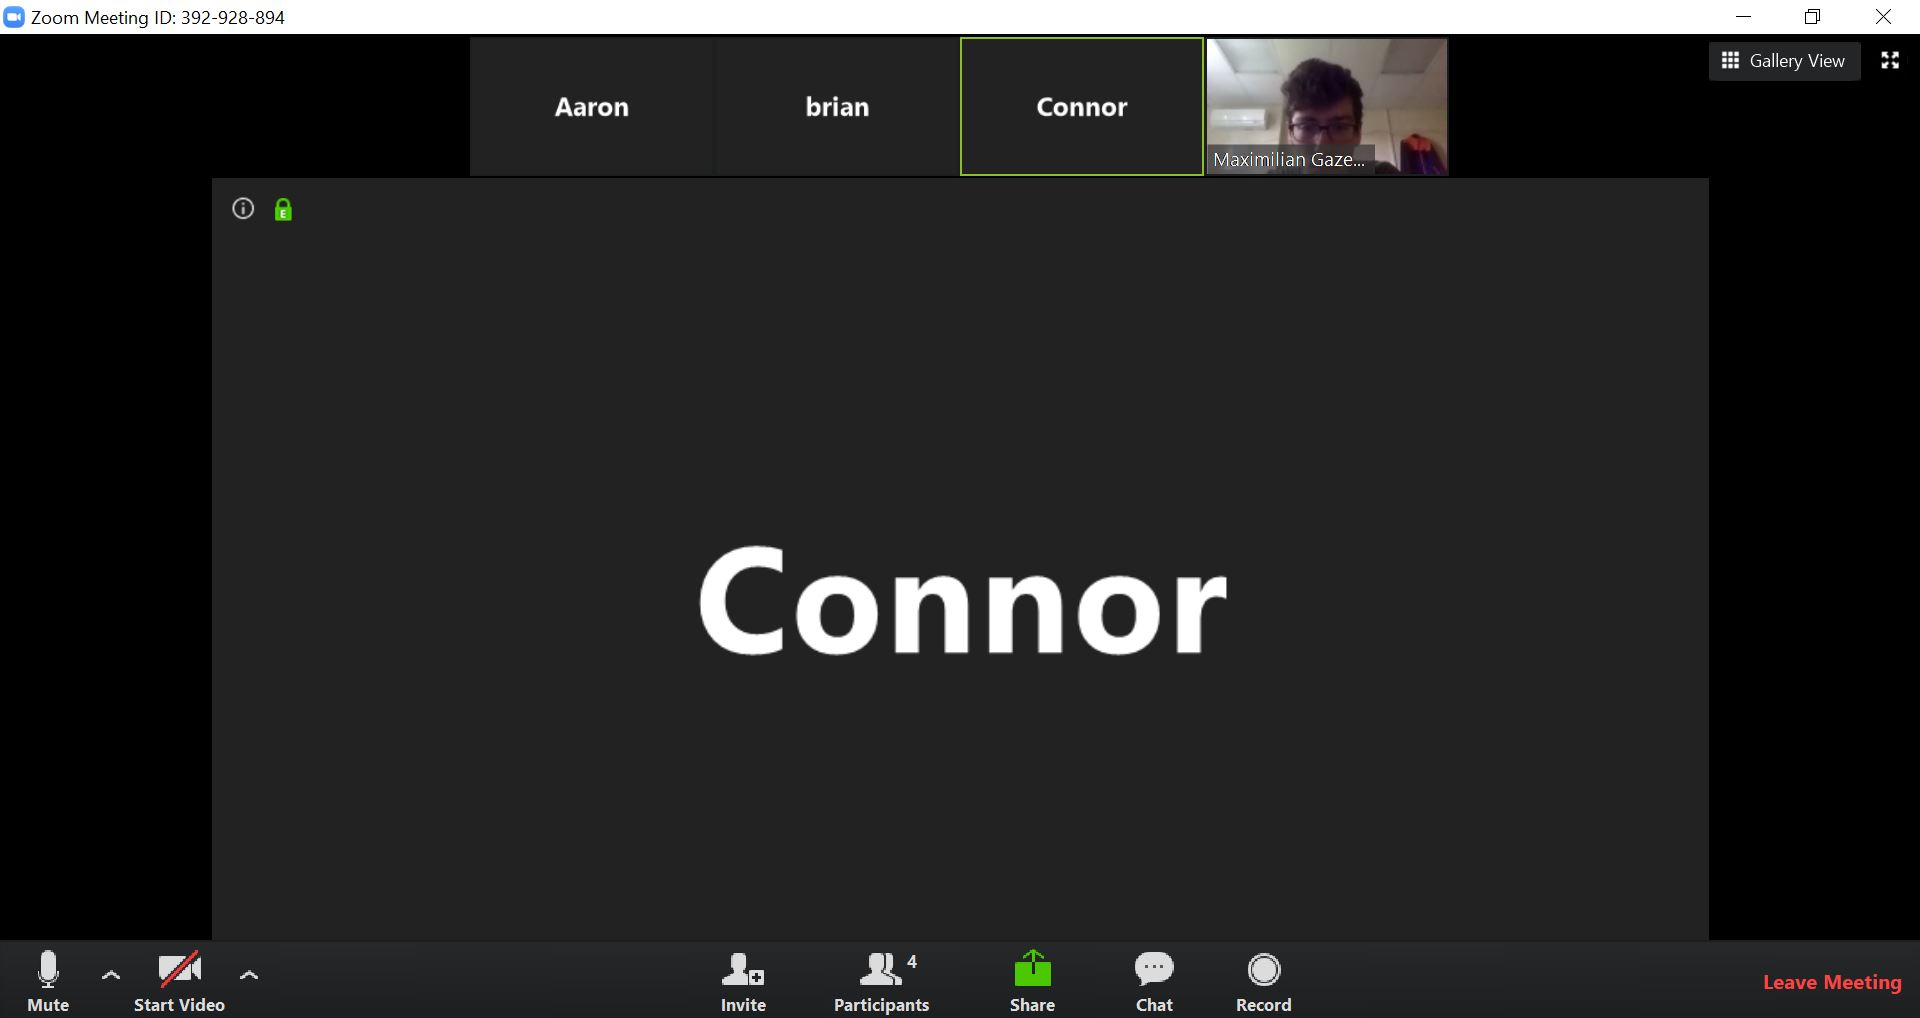

In [1]:
from IPython.display import Image
Image(filename='Lab3Zoom.JPG') 

# Problem 2 Description

In this lab you will carry out an end-to-end machine learning pipeline whichs includes pre-processing, classification and evaluation of the results. You will implement several classifiers on the ASL data set, they include: (1) LDA, (2) $k$-Nearest Neighbors, (3) Decision Tree, (4) Random Forests, (5) Support Vector Machines, and (7) Multi-Layer Perceptron.

* For each classifier, you should experiment with different parameter values and report the results.
    * Include the set of parameters that you have experimented. State any reasoning behind those choices.

* For the best set of parameters of each classifier, provide a summary table that compares performance between all classifiers on the provided data set.
    * You should common learning strategies such as cross-validation, data scaling, etc.

* Include a discussion as to why some out-perform others given the properties of the data set and the classifier parameters used.

## Submit your Solution

Along with your Jupyter Notebook answers, create a PDF of the notebook with your solutions.

As always, `add` and `commit` the final version of your work, and `push` your code to your GitHub repository.

* Submit the **URL** of your GitHub Repository as your assignment submission on Canvas (only one team member needs to do so).

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Setting up the pipeline

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from skimage.color import rgb2gray
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

X = np.load('train_data.npy')
y = np.load('train_labels.npy')

X.shape, y.shape

((1844, 100, 100, 3), (1844, 1))

In [3]:
X_gray = rgb2gray(X)
X_gray.shape
X_gray = X_gray.flatten().reshape(1844, 10000)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_gray, y, test_size=0.2)

## SVM

In [5]:
pipe_SVC = make_pipeline(StandardScaler(), PCA(n_components = 90, whiten=True, random_state=42), SVC(C = 15, gamma = 0.01, kernel='rbf', class_weight='balanced'))

In [6]:
#Used for Selecting ideal values
'''
param_grid_SVC = {'pca__n_components': [84,90,95],
                  'svc__C': [1, 5, 10, 15, 20, 30],
                  'svc__gamma': [0.0001, 0.001, 0.01, 0.1]}

grid = GridSearchCV(pipe_SVC, param_grid_SVC)
%time grid.fit(X_train, y_train.flatten())
print(grid.best_params_)
'''

"\nparam_grid_SVC = {'pca__n_components': [84,90,95],\n                  'svc__C': [1, 5, 10, 15, 20, 30],\n                  'svc__gamma': [0.0001, 0.001, 0.01, 0.1]}\n\ngrid = GridSearchCV(pipe_SVC, param_grid_SVC)\n%time grid.fit(X_train, y_train.flatten())\nprint(grid.best_params_)\n"

In [7]:
model_SVC = pipe_SVC.fit(X_train, y_train.flatten())
y_pred_pipe_SVC = model_SVC.predict(X_test)

print(classification_report(y_test, y_pred_pipe_SVC))
print()
conmatPipe = confusion_matrix(y_true=y_test, y_pred=y_pred_pipe_SVC)
print("Confusion matrix for pipeline\n",conmatPipe)
print()
print("Training and testing accuracy results respectively:", model_SVC.score(X_train,y_train), ",",model_SVC.score(X_test,y_test))
print()

              precision    recall  f1-score   support

           A       0.91      0.93      0.92        42
           B       0.74      0.86      0.80        37
           C       0.81      0.83      0.82        46
           D       0.79      0.79      0.79        24
           E       0.78      0.69      0.73        45
           F       0.81      0.88      0.84        49
           G       0.92      0.80      0.86        45
           H       0.86      0.84      0.85        43
           I       0.87      0.87      0.87        38

    accuracy                           0.83       369
   macro avg       0.83      0.83      0.83       369
weighted avg       0.83      0.83      0.83       369


Confusion matrix for pipeline
 [[39  0  0  0  2  0  0  0  1]
 [ 1 32  1  0  0  3  0  0  0]
 [ 0  2 38  2  4  0  0  0  0]
 [ 1  1  0 19  0  1  0  2  0]
 [ 0  4  6  1 31  2  0  0  1]
 [ 1  2  1  0  0 43  0  0  2]
 [ 0  1  0  1  1  1 36  4  1]
 [ 0  1  1  0  2  0  3 36  0]
 [ 1  0  0  1  0  3  0 

The parameter values used for C and gamma simply range over a reasonable set of data, such that the various combinations will converge onto an approximately best solution. The geometric intuition of gaussian spread remains, but the choice of parameters is dependent solely on how well it describes the data. 

## KNN

In [8]:
pipe_KNN = make_pipeline(StandardScaler().fit(X_train), PCA(n_components = 90, whiten=True, random_state=42).fit(X_train))

X_train = pipe_KNN.transform(X_train)
X_test = pipe_KNN.transform(X_test)

for i in range(10):
    knn = KNeighborsClassifier(n_neighbors=i+1, p=2, metric="minkowski")
    knn.fit(X_train, y_train.flatten())
    print('Testing accuracy of', i+1, 'neighbors is:', knn.score(X_test, y_test))

Testing accuracy of 1 neighbors is: 0.8102981029810298
Testing accuracy of 2 neighbors is: 0.7425474254742548
Testing accuracy of 3 neighbors is: 0.7262872628726287
Testing accuracy of 4 neighbors is: 0.6937669376693767
Testing accuracy of 5 neighbors is: 0.6829268292682927
Testing accuracy of 6 neighbors is: 0.6775067750677507
Testing accuracy of 7 neighbors is: 0.6585365853658537
Testing accuracy of 8 neighbors is: 0.6504065040650406
Testing accuracy of 9 neighbors is: 0.6124661246612466
Testing accuracy of 10 neighbors is: 0.6124661246612466


In [9]:
knn = KNeighborsClassifier(1, p=2, metric="minkowski")
knn.fit(X_train, y_train.flatten())

y_pred_pipe_KNN = knn.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred_pipe_KNN))
print()
conmatPipe = confusion_matrix(y_true=y_test, y_pred=y_pred_pipe_KNN)
print("Confusion matrix for pipeline\n",conmatPipe)
print()
print("Training and testing accuracy results respectively:", knn.score(X_train,y_train), ",",knn.score(X_test,y_test))
print()

              precision    recall  f1-score   support

           A       0.85      0.95      0.90        42
           B       0.63      0.92      0.75        37
           C       0.93      0.80      0.86        46
           D       0.68      0.71      0.69        24
           E       0.86      0.67      0.75        45
           F       0.83      0.78      0.80        49
           G       0.92      0.78      0.84        45
           H       0.78      0.88      0.83        43
           I       0.86      0.79      0.82        38

    accuracy                           0.81       369
   macro avg       0.81      0.81      0.80       369
weighted avg       0.82      0.81      0.81       369


Confusion matrix for pipeline
 [[40  1  0  0  0  1  0  0  0]
 [ 0 34  1  0  0  1  0  1  0]
 [ 0  3 37  1  1  1  0  2  1]
 [ 1  1  0 17  2  0  1  1  1]
 [ 1  6  2  2 30  2  0  1  1]
 [ 0  7  0  1  0 38  0  2  1]
 [ 2  1  0  1  0  1 35  4  1]
 [ 1  0  0  0  2  0  2 38  0]
 [ 2  1  0  3  0  2  0 

Number of neighbors was a parameter tested and the metric for distance was minkowski. The number of neighbors is the most important parameter to range in a KNN model, and the minkowski distance is used because it is the generalized version of both the euclidean and manhattan distance. 

## Random Forest

In [11]:
pipe_RFC = make_pipeline(StandardScaler(), PCA(n_components = 84,whiten=True, random_state=42), RandomForestClassifier())

In [12]:
param_grid_RFC = {'randomforestclassifier__n_estimators': [50,100,150,200],
              'randomforestclassifier__min_samples_leaf':  [1, 5, 15],
              'randomforestclassifier__max_depth': [6, 10, 15, 25, 50]}

grid = GridSearchCV(pipe_RFC, param_grid_RFC)
%time grid.fit(X_train, y_train.flatten())
print(grid.best_params_)

/Users/Catalyst/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 2min 29s, sys: 1.57 s, total: 2min 30s
Wall time: 2min
{'randomforestclassifier__max_depth': 15, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 200}


In [13]:
model_RFC = pipe_RFC.fit(X_train, y_train.flatten())
y_pred_pipe_RFC = model_RFC.predict(X_test)

print(classification_report(y_test, y_pred_pipe_RFC))
print()
conmatPipe = confusion_matrix(y_true=y_test, y_pred=y_pred_pipe_RFC)
print("Confusion matrix for pipeline\n",conmatPipe)
print()
print("Training and testing accuracy results respectively:", model_RFC.score(X_train,y_train), ",", model_RFC.score(X_test,y_test))
print()

              precision    recall  f1-score   support

           A       0.42      0.76      0.54        42
           B       0.60      0.68      0.63        37
           C       0.60      0.57      0.58        46
           D       0.38      0.50      0.43        24
           E       0.45      0.40      0.42        45
           F       0.73      0.55      0.63        49
           G       0.69      0.53      0.60        45
           H       0.71      0.70      0.71        43
           I       0.73      0.42      0.53        38

    accuracy                           0.57       369
   macro avg       0.59      0.57      0.56       369
weighted avg       0.60      0.57      0.57       369


Confusion matrix for pipeline
 [[32  2  1  2  2  0  0  2  1]
 [ 2 25  3  0  3  0  1  3  0]
 [ 8  3 26  3  6  0  0  0  0]
 [ 4  1  2 12  1  2  0  0  2]
 [ 8  3  4  3 18  3  3  1  2]
 [ 5  2  4  3  4 27  0  3  1]
 [ 8  4  1  4  1  2 24  1  0]
 [ 3  0  0  3  2  1  4 30  0]
 [ 6  2  2  2  3  2  3 

/Users/Catalyst/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Parameters tested for random forest classifer were n_estimators, min_samples_leaf, and max_depth. N_estimators is the number of trees in the forest. Min_samples_leaf is the minimum number of samples required to be at a leaf node. The max_depth is the number of layers in a given tree. To reduce overfitting, the max_depth was kept within 50. As well, the n_estimators ranged broadly to see if having more trees would help make the majority vote more accurate and less vulnerable to random outlier trees. The best parameters for the model were n_estimators = 200, min_samples_leaf = 1, and max_depth = 15.

In [14]:
## pipeline for random forest classifier
pipe_RFC = make_pipeline(StandardScaler().fit(X_gray), PCA(n_components = 84,whiten=True, random_state=42), RandomForestClassifier(max_depth=15, min_samples_leaf=1,n_estimators=200))

## LDA

In [16]:
pipe_lda = make_pipeline(StandardScaler(), PCA(whiten=True, random_state=42, n_components=90), LDA(n_components=8, solver='svd'))

In [17]:
# param_grid = {'pca__n_components': [84,90],
#               'lineardiscriminantanalysis__solver': ['svd','lsqr','eigen']}

# lda_grid = GridSearchCV(pipe_lda, param_grid)
# %time lda_grid.fit(X_train, y_train.ravel())
# print(lda_grid.best_params_)

In [18]:
lda_model = pipe_lda.fit(X_train, y_train.ravel())
y_pred_pipe_lda = lda_model.predict(X_test)

print(classification_report(y_test, y_pred_pipe_lda))
print()
conmatPipe = confusion_matrix(y_true=y_test, y_pred=y_pred_pipe_lda)
print("Confusion matrix for pipeline\n",conmatPipe)
print()
print("Training and testing accuracy results respectively:", lda_model.score(X_train,y_train), ",", lda_model.score(X_test,y_test))
print()

              precision    recall  f1-score   support

           A       0.60      0.62      0.61        42
           B       0.37      0.59      0.45        37
           C       0.73      0.59      0.65        46
           D       0.58      0.58      0.58        24
           E       0.43      0.33      0.38        45
           F       0.58      0.51      0.54        49
           G       0.53      0.42      0.47        45
           H       0.48      0.51      0.49        43
           I       0.60      0.71      0.65        38

    accuracy                           0.53       369
   macro avg       0.54      0.54      0.54       369
weighted avg       0.55      0.53      0.53       369


Confusion matrix for pipeline
 [[26  3  1  1  5  2  3  1  0]
 [ 4 22  0  1  3  3  0  1  3]
 [ 0  4 27  3  8  1  0  1  2]
 [ 1  1  1 14  1  2  1  1  2]
 [ 5 11  5  0 15  5  0  1  3]
 [ 2 13  3  0  1 25  1  2  2]
 [ 2  2  0  2  1  1 19 16  2]
 [ 1  2  0  2  1  0 11 22  4]
 [ 2  2  0  1  0  4  1 

Parameter tested for Linear Discriminant Analysis (LDA) classifer was solver. Solver selects between different calculation methods such as svd (singular value decomposition), lsqr (least square solution), and eigen (egeinvalue decomposition). The best parameter for the model was solver = svd.

## MLP

In [19]:
# param_grid = {'pca__n_components': [90],
#               'mlpclassifier__activation': ['tanh', 'relu'],
#               'mlpclassifier__solver': ['adam','lbfgs','sgd'],
# #               'mlpclassifier__batch_size': [1,8,20],
#               'mlpclassifier__learning_rate_init':[0.01,0.05,0.1,0.2],
#               'mlpclassifier__learning_rate':['constant','invscaling','adaptive'],
#               'mlpclassifier__hidden_layer_sizes': [(1),(11)]}
             

# grid_mlp = GridSearchCV(pipe_mlp, param_grid)
# %time grid_mlp.fit(X_train, y_train.flatten())
# print(grid_mlp.best_params_)

In [21]:
from sklearn.neural_network import MLPClassifier as MLP
pipe_mlp = make_pipeline(StandardScaler(), PCA(whiten=True, random_state=42), MLP(activation='relu', solver='adam', batch_size=11, learning_rate = 'adaptive', learning_rate_init=0.01, hidden_layer_sizes=(11),early_stopping=True))

In [22]:
mlp_model = pipe_mlp.fit(X_train, y_train.ravel())
y_pred_pipe_mlp = mlp_model.predict(X_test)

print(classification_report(y_test, y_pred_pipe_mlp))
print()
conmatPipe = confusion_matrix(y_true=y_test, y_pred=y_pred_pipe_mlp)
print("Confusion matrix for pipeline\n",conmatPipe)
print()
print("Training and testing accuracy results respectively:", mlp_model.score(X_train,y_train), ",", mlp_model.score(X_test,y_test))
print()

              precision    recall  f1-score   support

           A       0.62      0.69      0.65        42
           B       0.63      0.59      0.61        37
           C       0.58      0.61      0.60        46
           D       0.41      0.38      0.39        24
           E       0.53      0.36      0.43        45
           F       0.61      0.76      0.67        49
           G       0.71      0.53      0.61        45
           H       0.65      0.77      0.70        43
           I       0.66      0.71      0.68        38

    accuracy                           0.61       369
   macro avg       0.60      0.60      0.59       369
weighted avg       0.61      0.61      0.60       369


Confusion matrix for pipeline
 [[29  0  2  1  2  1  3  1  3]
 [ 2 22  2  1  2  6  0  0  2]
 [ 4  1 28  4  6  2  1  0  0]
 [ 3  2  1  9  1  4  0  1  3]
 [ 2  4  7  3 16  8  1  3  1]
 [ 1  3  2  1  0 37  1  3  1]
 [ 4  2  1  1  2  0 24 10  1]
 [ 0  1  1  1  1  0  3 33  3]
 [ 2  0  4  1  0  3  1 

The choices of parameter values in the MLP are simply all the common parameters used in literature today. Since the intuition behind MLPs are lost, researchers tend to try different methods and see what works best. Hence, there are different learning rates, activation functions, initializations, etc. 

## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
pipe_DTC = make_pipeline(StandardScaler(), PCA(n_components = 84,whiten=True, random_state=42), DecisionTreeClassifier())

In [24]:
param_grid_DTC = {'decisiontreeclassifier__min_samples_leaf':  [1, 5, 10, 15],
              'decisiontreeclassifier__max_depth': [6, 10, 15, 25, 50]}

grid = GridSearchCV(pipe_DTC, param_grid_DTC)
%time grid.fit(X_train, y_train.flatten())
print(grid.best_params_)

/Users/Catalyst/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 7.69 s, sys: 110 ms, total: 7.8 s
Wall time: 4.02 s
{'decisiontreeclassifier__max_depth': 15, 'decisiontreeclassifier__min_samples_leaf': 1}


In [25]:
model_DTC = pipe_DTC.fit(X_train, y_train.flatten())
y_pred_pipe_DTC = model_DTC.predict(X_test)

print(classification_report(y_test, y_pred_pipe_DTC))
print()
conmatPipe = confusion_matrix(y_true=y_test, y_pred=y_pred_pipe_DTC)
print("Confusion matrix for pipeline\n",conmatPipe)
print()
print("Training and testing accuracy results respectively:", model_DTC.score(X_train,y_train), ",", model_DTC.score(X_test,y_test))
print()

              precision    recall  f1-score   support

           A       0.51      0.55      0.53        42
           B       0.33      0.41      0.37        37
           C       0.48      0.52      0.50        46
           D       0.19      0.25      0.22        24
           E       0.50      0.51      0.51        45
           F       0.51      0.47      0.49        49
           G       0.59      0.38      0.46        45
           H       0.47      0.47      0.47        43
           I       0.37      0.34      0.36        38

    accuracy                           0.44       369
   macro avg       0.44      0.43      0.43       369
weighted avg       0.46      0.44      0.45       369


Confusion matrix for pipeline
 [[23  3  5  2  0  3  2  1  3]
 [ 3 15  6  5  2  2  1  0  3]
 [ 1  3 24  1  4  6  0  2  5]
 [ 6  1  0  6  3  2  0  4  2]
 [ 0  4  6  3 23  2  0  5  2]
 [ 1  9  3  4  2 23  2  2  3]
 [ 5  4  3  3  5  3 17  3  2]
 [ 4  4  1  4  2  1  5 20  2]
 [ 2  2  2  3  5  3  2 

Both the leaf number and the max depth number are values that control overfitting, so ranging over a broad range of numbers will find the combination that reduces overfitting. 

## Summary Table of Classifiers

In [40]:
print('Summary Table of Classifiers')
print('Classifier', '\t\tTraining Accuracy', '\t\tTesting Accuracy')
print('SVM', '\t\t\t1.0' , '\t\t\t\t0.83')
print('KNN', '\t\t\t1.0' , '\t\t\t\t0.81')
print('MLP', '\t\t\t0.86' , '\t\t\t\t0.61')
print('Random Forest', '\t\t0.99' , '\t\t\t\t0.57')
print('LDA', '\t\t\t0.67' , '\t\t\t\t0.53')
print('Decision Tree', '\t\t1.0' , '\t\t\t\t0.44')

Summary Table of Classifiers
Classifier 		Training Accuracy 		Testing Accuracy
SVM 			1.0 				0.83
KNN 			1.0 				0.81
MLP 			0.86 				0.61
Random Forest 		0.99 				0.57
LDA 			0.67 				0.53
Decision Tree 		1.0 				0.44


## Discussion of Classifier Performance

The classifiers are listed in descending order of test accuracy, with SVM being the best and closely followed by KNN. The size of the dataset we are using is small in comparison to the complexity of the data. As a result, MLP performs poorly as this model requires many parameters, and thus a lot of data (at least 10x as much data as parameters). The data used fails to meet this condition, hence the poor test accuracy of 61%. The choice of parameters in MLP tend to escape intution and are chosen with regard to how performance is affected strictly. SVM is a powerful model with an RBF kernel because it can properly split the data in this higher dimensional space. The large value of C at 15, the cost of misclassification, gives low bias and high variance. However, the gamma value of 0.01, indicating the spread of the gaussian kernel, indicates that the data is relatively close to each other, requiring a tighter standard deviation to properly split data. Similarly, KNN performs well. Interestingly, the best number of neighbors was one, indicating that the feature space has distorted distances to neighbors of the same class. Clusters do not necessarily belong to the same class, but there is sufficient similarity between classes with the closest neighbor. As expected, decision trees perform less well than random forests, since the prior is prone to overfitting. Random forest rectify this issue, but still underperform compared to other models. The number of estimators at 200 is unsurprising as more decision trees results in greater performance. The minimum leaf number of 1 is fine as this promotes overfitting within the trees, but in the overall forest performance is stronger. LDA also performs poorly; this is expected as it simply divides the data with linear functions. SVM does the same but in a higher dimensional space where a kernel acts on the data where it can properly divide. The added complexity improves the model. 